## Stock Market Prediction

In [164]:
!pip install pandas-datareader

In [165]:
!pip install keras

In [166]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
### Data Collection
import pandas_datareader as pdr
key="0d06a7903ca71200a1390ea8fe2a54db31db6dd4"

In [168]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

C:\Users\hp\AppData\Local\Temp\ipykernel_9356\1763598363.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('TSLA', api_key=key)


In [169]:
df.to_csv('TSLA.csv')

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('TSLA.csv')

# Basic EDA

In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-09-06 00:00:00+00:00,280.95,291.17,278.88,284.80,7480760,18.730000,19.411333,18.592000,18.986667,112211400,0.0,1.0
1,TSLA,2018-09-07 00:00:00+00:00,263.24,268.35,252.25,260.10,22491931,17.549333,17.890000,16.816667,17.340000,337378965,0.0,1.0
2,TSLA,2018-09-10 00:00:00+00:00,285.50,286.03,271.00,273.26,14283528,19.033333,19.068667,18.066667,18.217333,214252920,0.0,1.0
3,TSLA,2018-09-11 00:00:00+00:00,279.44,282.00,273.55,279.47,9169989,18.629333,18.800000,18.236667,18.631333,137549835,0.0,1.0
4,TSLA,2018-09-12 00:00:00+00:00,290.54,292.50,278.65,281.44,10015427,19.369333,19.500000,18.576667,18.762667,150231405,0.0,1.0


In [172]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-09-10 00:00:00+00:00,285.50,286.03,271.00,273.26,14283528,19.033333,19.068667,18.066667,18.217333,214252920,0.0,1.0
1,TSLA,2018-09-11 00:00:00+00:00,279.44,282.00,273.55,279.47,9169989,18.629333,18.800000,18.236667,18.631333,137549835,0.0,1.0
2,TSLA,2018-09-12 00:00:00+00:00,290.54,292.50,278.65,281.44,10015427,19.369333,19.500000,18.576667,18.762667,150231405,0.0,1.0
3,TSLA,2018-09-13 00:00:00+00:00,289.46,295.00,285.18,288.02,6340336,19.297333,19.666667,19.012000,19.201333,95105040,0.0,1.0
4,TSLA,2018-09-14 00:00:00+00:00,295.20,297.33,286.52,288.76,6765612,19.680000,19.822000,19.101333,19.250667,101484180,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,TSLA,2023-08-28 00:00:00+00:00,238.82,244.3800,235.35,242.58,107673727,238.82,244.3800,235.35,242.58,107673727,0.0,1.0
1252,TSLA,2023-08-29 00:00:00+00:00,257.18,257.4800,237.77,238.58,134047603,257.18,257.4800,237.77,238.58,134047603,0.0,1.0
1253,TSLA,2023-08-30 00:00:00+00:00,256.90,260.5100,250.59,254.20,121988437,256.90,260.5100,250.59,254.20,121988437,0.0,1.0
1254,TSLA,2023-08-31 00:00:00+00:00,258.08,261.1800,255.05,255.98,108861698,258.08,261.1800,255.05,255.98,108861698,0.0,1.0
1255,TSLA,2023-09-01 00:00:00+00:00,245.01,259.0794,242.01,257.26,132541640,245.01,259.0794,242.01,257.26,132541640,0.0,1.0


In [173]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,TSLA,2023-08-30 00:00:00+00:00,256.90,260.5100,250.59,254.200,121988437,256.90,260.5100,250.59,254.200,121988437,0.0,1.0
1252,TSLA,2023-08-31 00:00:00+00:00,258.08,261.1800,255.05,255.980,108861698,258.08,261.1800,255.05,255.980,108861698,0.0,1.0
1253,TSLA,2023-09-01 00:00:00+00:00,245.01,259.0794,242.01,257.260,132541640,245.01,259.0794,242.01,257.260,132541640,0.0,1.0
1254,TSLA,2023-09-05 00:00:00+00:00,256.49,258.0000,244.86,245.000,129469565,256.49,258.0000,244.86,245.000,129469565,0.0,1.0
1255,TSLA,2023-09-06 00:00:00+00:00,251.92,255.3900,245.06,255.135,116959759,251.92,255.3900,245.06,255.135,116959759,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1256 non-null   object 
 1   date         1256 non-null   object 
 2   close        1256 non-null   float64
 3   high         1256 non-null   float64
 4   low          1256 non-null   float64
 5   open         1256 non-null   float64
 6   volume       1256 non-null   int64  
 7   adjClose     1256 non-null   float64
 8   adjHigh      1256 non-null   float64
 9   adjLow       1256 non-null   float64
 10  adjOpen      1256 non-null   float64
 11  adjVolume    1256 non-null   int64  
 12  divCash      1256 non-null   float64
 13  splitFactor  1256 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.5+ KB


In [6]:
from datetime import datetime

In [7]:
df['date']=pd.to_datetime(df['date'])

In [8]:
df.set_index('date',inplace=True)
df

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2018-09-06 00:00:00+00:00,TSLA,280.95,291.1700,278.88,284.80,7480760,18.730000,19.411333,18.592000,18.986667,112211400,0.0,1.0
2018-09-07 00:00:00+00:00,TSLA,263.24,268.3500,252.25,260.10,22491931,17.549333,17.890000,16.816667,17.340000,337378965,0.0,1.0
2018-09-10 00:00:00+00:00,TSLA,285.50,286.0300,271.00,273.26,14283528,19.033333,19.068667,18.066667,18.217333,214252920,0.0,1.0
2018-09-11 00:00:00+00:00,TSLA,279.44,282.0000,273.55,279.47,9169989,18.629333,18.800000,18.236667,18.631333,137549835,0.0,1.0
2018-09-12 00:00:00+00:00,TSLA,290.54,292.5000,278.65,281.44,10015427,19.369333,19.500000,18.576667,18.762667,150231405,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28 00:00:00+00:00,TSLA,238.82,244.3800,235.35,242.58,107673727,238.820000,244.380000,235.350000,242.580000,107673727,0.0,1.0
2023-08-29 00:00:00+00:00,TSLA,257.18,257.4800,237.77,238.58,134047603,257.180000,257.480000,237.770000,238.580000,134047603,0.0,1.0
2023-08-30 00:00:00+00:00,TSLA,256.90,260.5100,250.59,254.20,121988437,256.900000,260.510000,250.590000,254.200000,121988437,0.0,1.0


In [9]:
df.resample(rule='A').max()['open']

date
2018-12-31 00:00:00+00:00     375.00
2019-12-31 00:00:00+00:00     435.00
2020-12-31 00:00:00+00:00    2295.12
2021-12-31 00:00:00+00:00    1234.41
2022-12-31 00:00:00+00:00    1189.55
2023-12-31 00:00:00+00:00     296.04
Freq: A-DEC, Name: open, dtype: float64

<Axes: xlabel='date'>

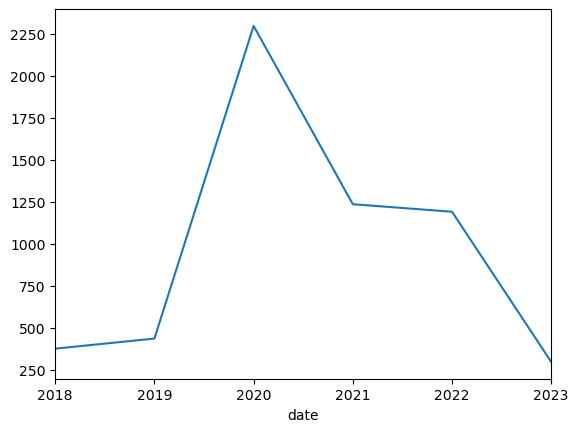

In [10]:
df.resample(rule='A').max()['open'].plot()

In [11]:
df.resample(rule='A').min()['open']

date
2018-12-31 00:00:00+00:00    255.25
2019-12-31 00:00:00+00:00    181.10
2020-12-31 00:00:00+00:00    356.00
2021-12-31 00:00:00+00:00    552.55
2022-12-31 00:00:00+00:00    110.35
2023-12-31 00:00:00+00:00    103.00
Freq: A-DEC, Name: open, dtype: float64

<Axes: xlabel='date'>

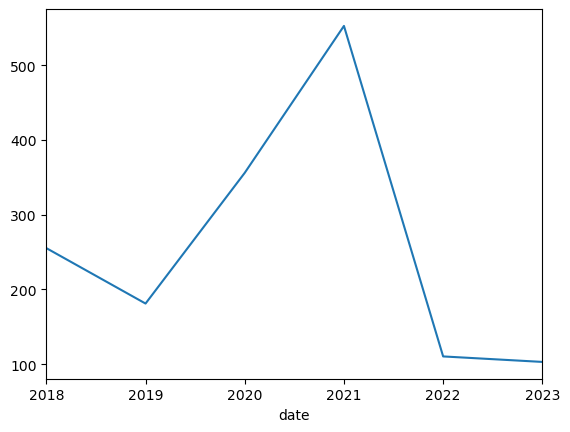

In [12]:
df.resample(rule='A').min()['open'].plot()

In [13]:
df.resample(rule='QS').min()['open']

date
2018-07-01 00:00:00+00:00    260.100
2018-10-01 00:00:00+00:00    255.250
2019-01-01 00:00:00+00:00    259.710
2019-04-01 00:00:00+00:00    181.100
2019-07-01 00:00:00+00:00    213.600
2019-10-01 00:00:00+00:00    229.800
2020-01-01 00:00:00+00:00    374.700
2020-04-01 00:00:00+00:00    481.030
2020-07-01 00:00:00+00:00    356.000
2020-10-01 00:00:00+00:00    394.000
2021-01-01 00:00:00+00:00    600.550
2021-04-01 00:00:00+00:00    552.550
2021-07-01 00:00:00+00:00    628.370
2021-10-01 00:00:00+00:00    776.200
2022-01-01 00:00:00+00:00    700.390
2022-04-01 00:00:00+00:00    623.850
2022-07-01 00:00:00+00:00    266.145
2022-10-01 00:00:00+00:00    110.350
2023-01-01 00:00:00+00:00    103.000
2023-04-01 00:00:00+00:00    152.640
2023-07-01 00:00:00+00:00    214.120
Freq: QS-JAN, Name: open, dtype: float64

<Axes: xlabel='date'>

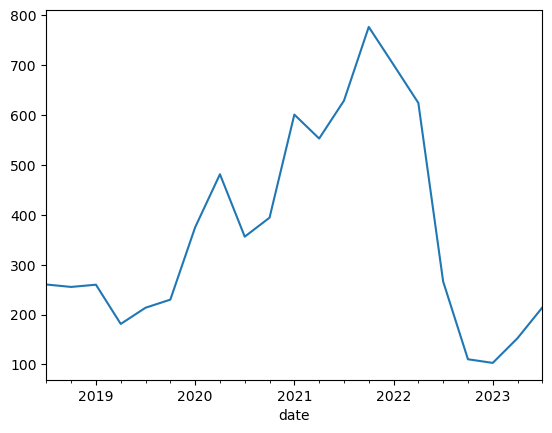

In [14]:
df.resample(rule='QS').min()['open'].plot()

In [15]:
df.resample(rule='QS').max()['open']

date
2018-07-01 00:00:00+00:00     312.900
2018-10-01 00:00:00+00:00     375.000
2019-01-01 00:00:00+00:00     346.210
2019-04-01 00:00:00+00:00     288.300
2019-07-01 00:00:00+00:00     259.170
2019-10-01 00:00:00+00:00     435.000
2020-01-01 00:00:00+00:00     923.500
2020-04-01 00:00:00+00:00    1012.780
2020-07-01 00:00:00+00:00    2295.120
2020-10-01 00:00:00+00:00     699.990
2021-01-01 00:00:00+00:00     891.380
2021-04-01 00:00:00+00:00     770.700
2021-07-01 00:00:00+00:00     787.200
2021-10-01 00:00:00+00:00    1234.410
2022-01-01 00:00:00+00:00    1189.550
2022-04-01 00:00:00+00:00    1136.300
2022-07-01 00:00:00+00:00     935.000
2022-10-01 00:00:00+00:00     254.500
2023-01-01 00:00:00+00:00     211.755
2023-04-01 00:00:00+00:00     275.130
2023-07-01 00:00:00+00:00     296.040
Freq: QS-JAN, Name: open, dtype: float64

<Axes: xlabel='date'>

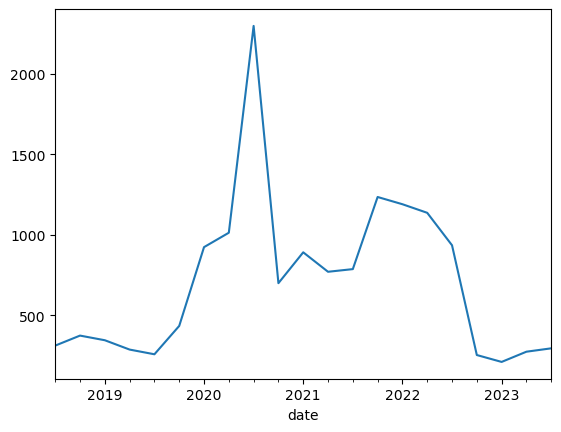

In [16]:
df.resample(rule='QS').max()['open'].plot()

In [17]:
df.resample(rule='M').min()['open']

date
2018-09-30 00:00:00+00:00    260.10
2018-10-31 00:00:00+00:00    255.25
2018-11-30 00:00:00+00:00    325.00
2018-12-31 00:00:00+00:00    300.00
2019-01-31 00:00:00+00:00    283.03
                              ...  
2023-05-31 00:00:00+00:00    160.01
2023-06-30 00:00:00+00:00    202.59
2023-07-31 00:00:00+00:00    255.85
2023-08-31 00:00:00+00:00    214.12
2023-09-30 00:00:00+00:00    257.26
Freq: M, Name: open, Length: 61, dtype: float64

<Axes: xlabel='date'>

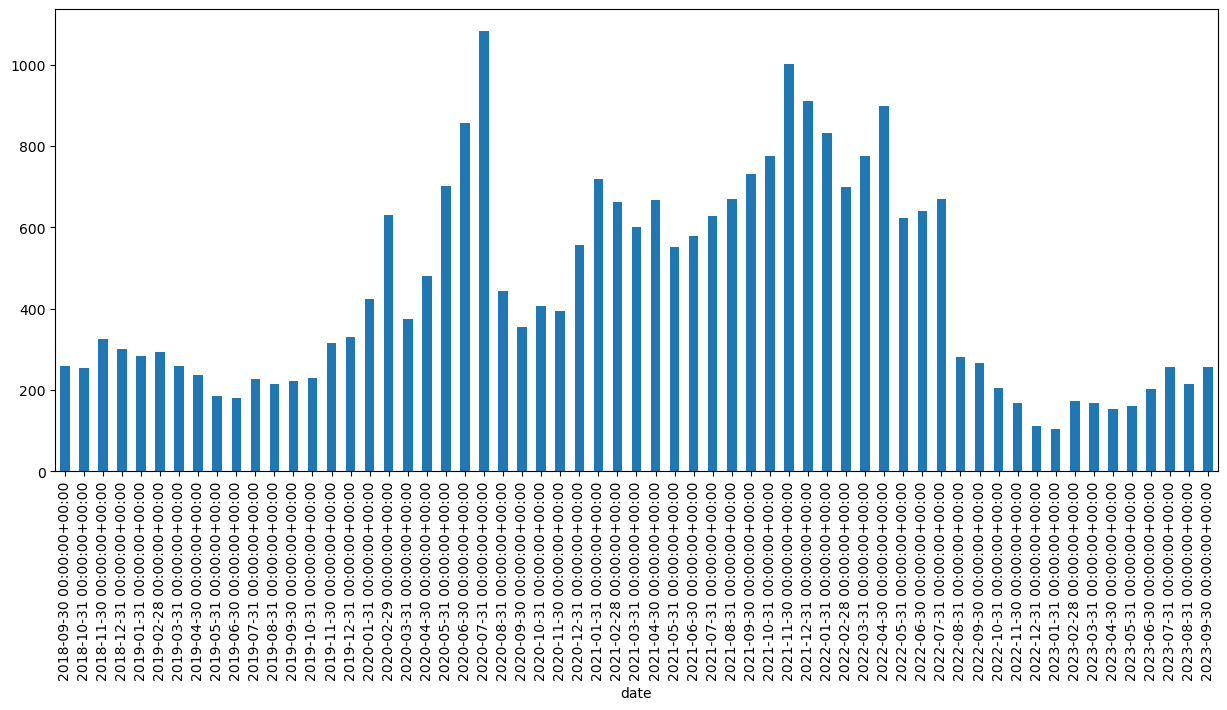

In [18]:
df.resample(rule='M').min()['open'].plot(kind='bar',figsize=(15,6))

In [19]:
df.resample(rule='M').max()['open'].max()

2295.12

<Axes: xlabel='date'>

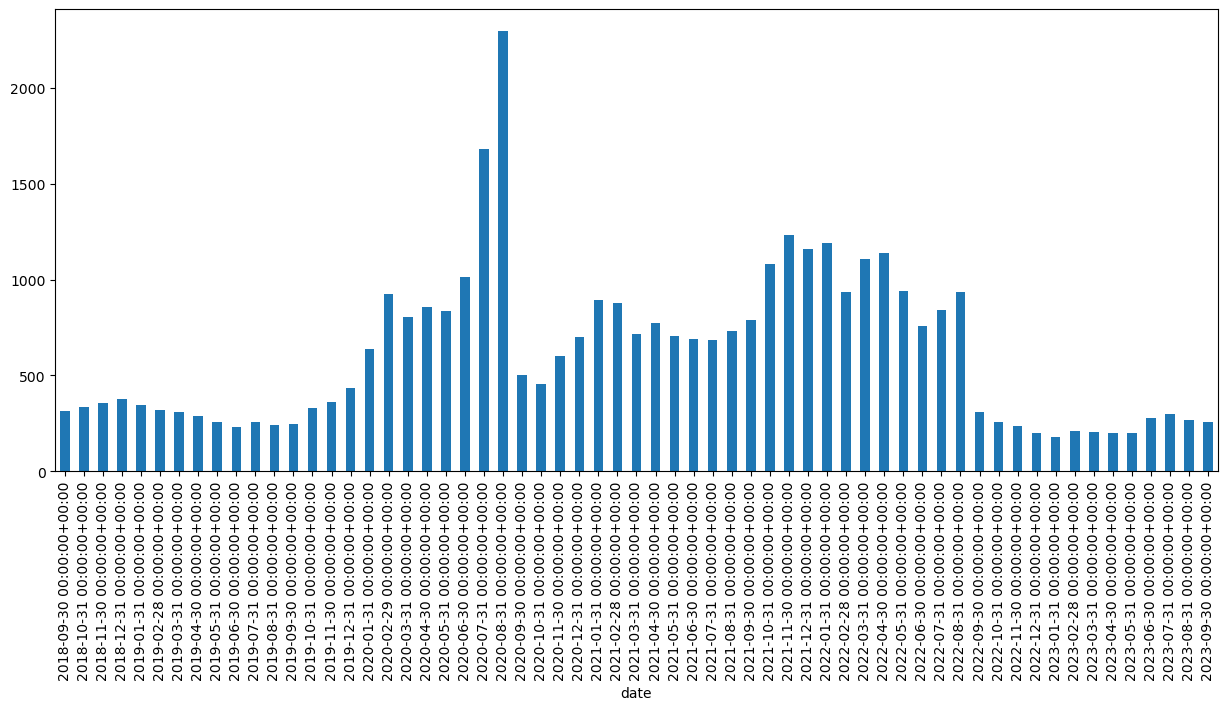

In [20]:
df.resample(rule='M').max()['open'].plot(kind='bar',figsize=(15,6))

In [21]:
df1=df.reset_index()
df1

,date,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2018-09-06 00:00:00+00:00,TSLA,280.95,291.1700,278.88,284.80,7480760,18.730000,19.411333,18.592000,18.986667,112211400,0.0,1.0
1,2018-09-07 00:00:00+00:00,TSLA,263.24,268.3500,252.25,260.10,22491931,17.549333,17.890000,16.816667,17.340000,337378965,0.0,1.0
2,2018-09-10 00:00:00+00:00,TSLA,285.50,286.0300,271.00,273.26,14283528,19.033333,19.068667,18.066667,18.217333,214252920,0.0,1.0
3,2018-09-11 00:00:00+00:00,TSLA,279.44,282.0000,273.55,279.47,9169989,18.629333,18.800000,18.236667,18.631333,137549835,0.0,1.0
4,2018-09-12 00:00:00+00:00,TSLA,290.54,292.5000,278.65,281.44,10015427,19.369333,19.500000,18.576667,18.762667,150231405,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2023-08-28 00:00:00+00:00,TSLA,238.82,244.3800,235.35,242.58,107673727,238.820000,244.380000,235.350000,242.580000,107673727,0.0,1.0
1252,2023-08-29 00:00:00+00:00,TSLA,257.18,257.4800,237.77,238.58,134047603,257.180000,257.480000,237.770000,238.580000,134047603,0.0,1.0
1253,2023-08-30 00:00:00+00:00,TSLA,256.90,260.5100,250.59,254.20,121988437,256.900000,260.510000,250.590000,254.200000,121988437,0.0,1.0
1254,2023-08-31 00:00:00+00:00,TSLA,258.08,261.1800,255.05,255.98,108861698,258.080000,261.180000,255.050000,255.980000,108861698,0.0,1.0


In [22]:
df2=df1[['date','open']]
df2

,date,open
0,2018-09-06 00:00:00+00:00,284.80
1,2018-09-07 00:00:00+00:00,260.10
2,2018-09-10 00:00:00+00:00,273.26
3,2018-09-11 00:00:00+00:00,279.47
4,2018-09-12 00:00:00+00:00,281.44
...,...,...
1251,2023-08-28 00:00:00+00:00,242.58
1252,2023-08-29 00:00:00+00:00,238.58
1253,2023-08-30 00:00:00+00:00,254.20
1254,2023-08-31 00:00:00+00:00,255.98


# Simple Moving Average (1st smoothing technique)

In [23]:
df2['SMA']=df2['open'].rolling(window=10,min_periods=1).mean()

C:\Users\abhis\AppData\Local\Temp\ipykernel_2668\789536523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA']=df2['open'].rolling(window=10,min_periods=1).mean()


In [24]:
df2.set_index('date',inplace=True)

<Axes: xlabel='date'>

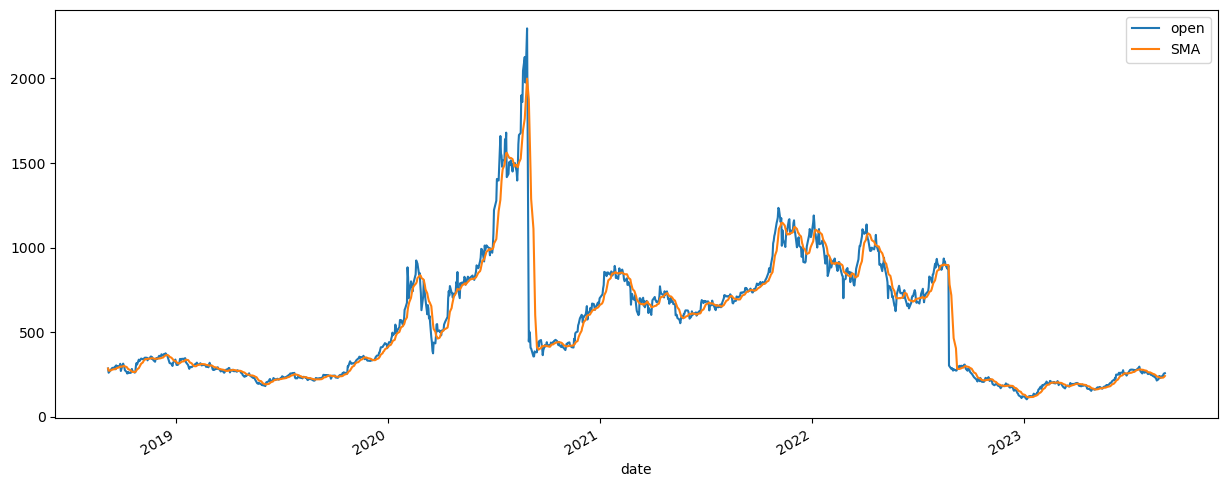

In [25]:
df2[['open','SMA']].plot(figsize=(15,6))

<Axes: xlabel='date'>

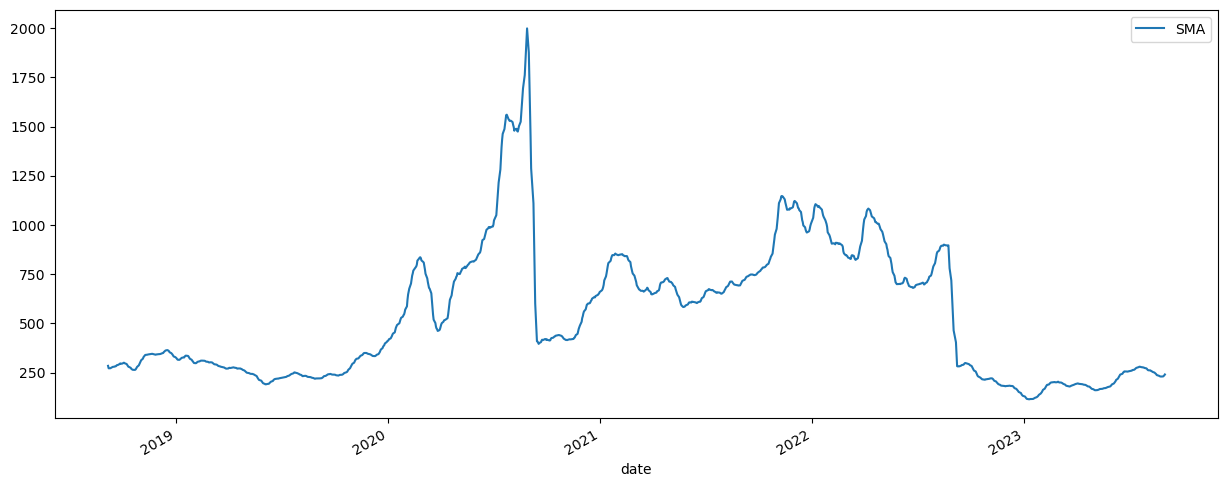

In [26]:
df2[['SMA']].plot(figsize=(15,6))

# Exponential Weighted Moving Average(2nd smoothing technique)

In [27]:
df2['EWMA']=df2['open'].ewm(alpha=0.3,adjust=False).mean()

C:\Users\abhis\AppData\Local\Temp\ipykernel_2668\694017583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EWMA']=df2['open'].ewm(alpha=0.3,adjust=False).mean()


<Axes: xlabel='date'>

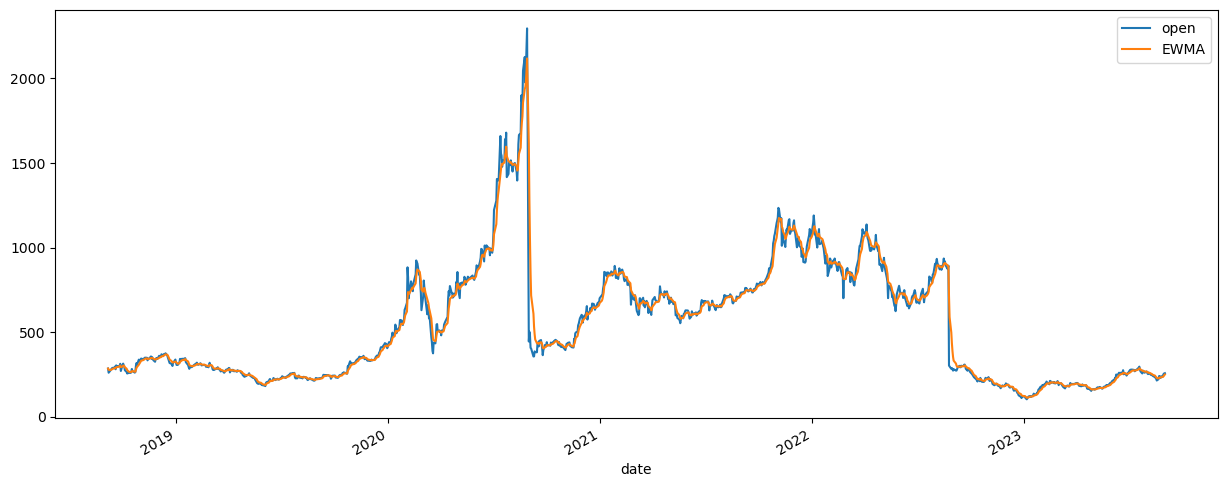

In [28]:
df2[['open','EWMA']].plot(figsize=(15,6))

<Axes: xlabel='date'>

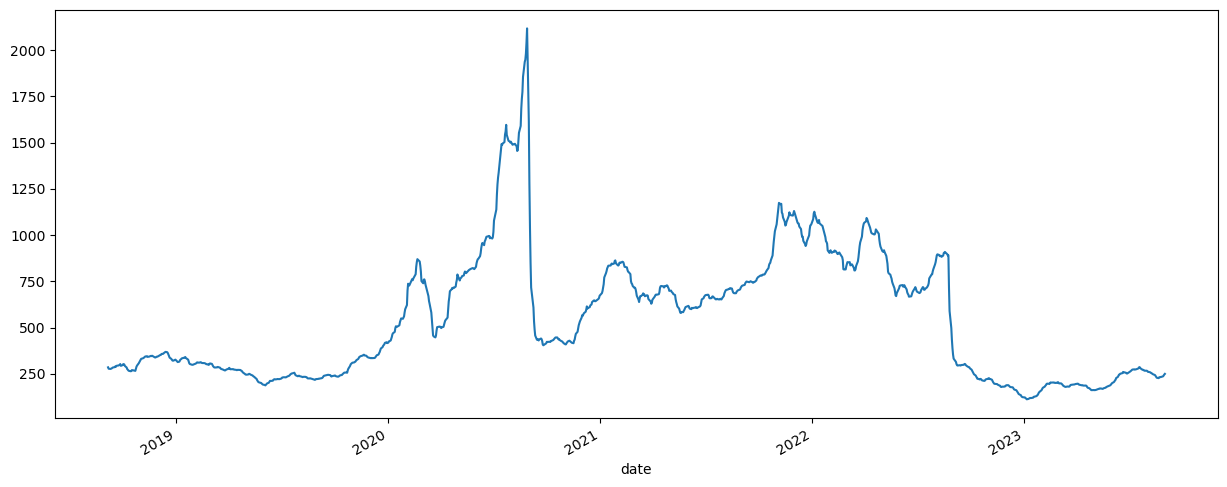

In [29]:
df2['EWMA'].plot(figsize=(15,6))

In [30]:
df3=df2['EWMA']

In [31]:
df3

date
2018-09-06 00:00:00+00:00    284.800000
2018-09-07 00:00:00+00:00    277.390000
2018-09-10 00:00:00+00:00    276.151000
2018-09-11 00:00:00+00:00    277.146700
2018-09-12 00:00:00+00:00    278.434690
                                ...    
2023-08-28 00:00:00+00:00    235.389377
2023-08-29 00:00:00+00:00    236.346564
2023-08-30 00:00:00+00:00    241.702595
2023-08-31 00:00:00+00:00    245.985816
2023-09-01 00:00:00+00:00    249.368072
Name: EWMA, Length: 1256, dtype: float64

In [34]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [36]:
print(df3)

[[0.08618531]
 [0.08249052]
 [0.08187273]
 ...
 [0.06469601]
 [0.06683171]
 [0.06851818]]


In [37]:
##splitting dataset into train and test split
training_size=int(len(df3)*0.65)
test_size=len(df3)-training_size
train_data,test_data=df3[0:training_size,:],df3[training_size:len(df2),:]

In [38]:
training_size,test_size

(816, 440)

In [39]:
train_data

array([[0.08618531],
       [0.08249052],
       [0.08187273],
       [0.08236921],
       [0.08301143],
       [0.08444526],
       [0.08555964],
       [0.08653118],
       [0.088206  ],
       [0.08695807],
       [0.08953248],
       [0.090458  ],
       [0.09122254],
       [0.09198508],
       [0.09280458],
       [0.09502218],
       [0.09019613],
       [0.09212972],
       [0.09470684],
       [0.09492222],
       [0.09366987],
       [0.0899062 ],
       [0.08575632],
       [0.08146473],
       [0.07986075],
       [0.0776789 ],
       [0.07667066],
       [0.0756747 ],
       [0.07597078],
       [0.07867613],
       [0.0786088 ],
       [0.07827745],
       [0.07704178],
       [0.07665399],
       [0.08194417],
       [0.08806611],
       [0.09100967],
       [0.09744109],
       [0.10058483],
       [0.10340624],
       [0.10623686],
       [0.10903802],
       [0.11051418],
       [0.11133358],
       [0.1125459 ],
       [0.11416638],
       [0.11537552],
       [0.116

In [40]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [41]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [42]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [43]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [44]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
import tensorflow as tf
# !pip install tensorflow scikeras scikit-learn

In [46]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [47]:
model=Sequential()

model.add(LSTM(units=60,return_sequences=True,input_shape=(100,1)))
           
model.add(LSTM(units=60,return_sequences=True))
                   
model.add(LSTM(units=60))
               
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 60)           14880     
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           29040     
                                                                 
 lstm_2 (LSTM)               (None, 60)                29040     
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 73021 (285.24 KB)
Trainable params: 73021 (285.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
23/23 [==============================] - 12s 193ms/step - loss: 0.0147 - val_loss: 0.0047
Epoch 2/100
23/23 [==============================] - 3s 153ms/step - loss: 0.0071 - val_loss: 0.0016
Epoch 3/100
23/23 [==============================] - 3s 112ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 3s 119ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 5/100
23/23 [==============================] - 3s 118ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 3s 113ms/step - loss: 0.0031 - val_loss: 9.5971e-04
Epoch 7/100
23/23 [==============================] - 3s 152ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 3s 153ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 9/100
23/23 [==============================] - 3s 125ms/step - loss: 0.0019 - val_loss: 7.2559e-04
Epoch 10/100
23/23 [==============================] - 3s 120ms/step - loss: 0.0017

23/23 [==============================] - 3s 135ms/step - loss: 2.6337e-04 - val_loss: 2.1753e-04
Epoch 77/100
23/23 [==============================] - 3s 124ms/step - loss: 2.8091e-04 - val_loss: 1.8715e-04
Epoch 78/100
23/23 [==============================] - 3s 121ms/step - loss: 3.5552e-04 - val_loss: 2.1445e-04
Epoch 79/100
23/23 [==============================] - 3s 121ms/step - loss: 4.1513e-04 - val_loss: 2.8972e-04
Epoch 80/100
23/23 [==============================] - 3s 121ms/step - loss: 3.2392e-04 - val_loss: 2.0775e-04
Epoch 81/100
23/23 [==============================] - 3s 129ms/step - loss: 2.3561e-04 - val_loss: 2.1353e-04
Epoch 82/100
23/23 [==============================] - 3s 142ms/step - loss: 2.5883e-04 - val_loss: 3.1701e-04
Epoch 83/100
23/23 [==============================] - 3s 136ms/step - loss: 4.1931e-04 - val_loss: 3.6832e-04
Epoch 84/100
23/23 [==============================] - 3s 134ms/step - loss: 2.7219e-04 - val_loss: 1.7491e-04
Epoch 85/100
23/23 [===

In [50]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 33ms/step


In [51]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [52]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

691.3372790171147

In [53]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

446.40616643515847

In [55]:
import matplotlib.pyplot as plt

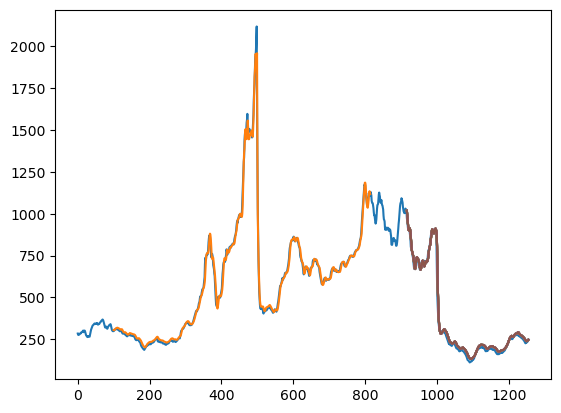

In [56]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [57]:
len(test_data)

440

In [58]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [59]:
x_input[0]

array([0.03814896, 0.03732523, 0.03689745, 0.03695253, 0.03711524,
       0.03602496, 0.03332687, 0.03123402, 0.02974658, 0.02798288,
       0.02681859, 0.02485925, 0.0247233 , 0.02496769, 0.0249458 ,
       0.02465075, 0.0248481 , 0.02517472, 0.02686183, 0.02732927,
       0.028195  , 0.02822509, 0.02934861, 0.02887631, 0.02824577,
       0.02821726, 0.0290664 , 0.03010207, 0.03135509, 0.03305492,
       0.03365095, 0.03471288, 0.03516903, 0.03780394, 0.0396005 ,
       0.04127844, 0.04358386, 0.046342  , 0.04802438, 0.05097615,
       0.05247694, 0.05724473, 0.06041314, 0.06346423, 0.06659624,
       0.06702801, 0.0689039 , 0.07060296, 0.07383116, 0.07244698,
       0.07275253, 0.07158647, 0.06974931, 0.06942962, 0.0704519 ,
       0.07155193, 0.07469888, 0.07725028, 0.07892706, 0.08015167,
       0.08071571, 0.07994077, 0.08054638, 0.08071078, 0.08118786,
       0.08296009, 0.08472795, 0.08684651, 0.08586432, 0.08344756,
       0.07993836, 0.07995458, 0.07860021, 0.07840906, 0.07701

In [60]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [61]:
temp_input

[0.03814896054508139,
 0.03732522522501089,
 0.03689744910423998,
 0.036952525909921305,
 0.037115236498743556,
 0.03602496229645548,
 0.03332686851223428,
 0.03123401724169647,
 0.029746583371926275,
 0.027982876694408937,
 0.02681858769204716,
 0.02485924839031356,
 0.02472329566611492,
 0.024967690195801015,
 0.024945799735195187,
 0.024650749590529236,
 0.024848098136350277,
 0.025174721153732343,
 0.026861825991492408,
 0.027329271601403762,
 0.0281949950577913,
 0.02822509331382342,
 0.02934861486305798,
 0.02887630924743377,
 0.02824577431190059,
 0.028217258696272063,
 0.029066395539249335,
 0.030102071610410147,
 0.03135508533215525,
 0.03305492088514701,
 0.033650947224487124,
 0.034712883632005115,
 0.03516903296822793,
 0.03780393708021712,
 0.03960050226710292,
 0.04127843606396556,
 0.043583863933613534,
 0.046342000442447503,
 0.04802438234894063,
 0.050976145999950276,
 0.05247694344973497,
 0.057244727083145985,
 0.060413142840900894,
 0.06346423087661661,
 0.066596238

In [62]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.07094397]
101
1 day input [0.03732523 0.03689745 0.03695253 0.03711524 0.03602496 0.03332687
 0.03123402 0.02974658 0.02798288 0.02681859 0.02485925 0.0247233
 0.02496769 0.0249458  0.02465075 0.0248481  0.02517472 0.02686183
 0.02732927 0.028195   0.02822509 0.02934861 0.02887631 0.02824577
 0.02821726 0.0290664  0.03010207 0.03135509 0.03305492 0.03365095
 0.03471288 0.03516903 0.03780394 0.0396005  0.04127844 0.04358386
 0.046342   0.04802438 0.05097615 0.05247694 0.05724473 0.06041314
 0.06346423 0.06659624 0.06702801 0.0689039  0.07060296 0.07383116
 0.07244698 0.07275253 0.07158647 0.06974931 0.06942962 0.0704519
 0.07155193 0.07469888 0.07725028 0.07892706 0.08015167 0.08071571
 0.07994077 0.08054638 0.08071078 0.08118786 0.08296009 0.08472795
 0.08684651 0.08586432 0.08344756 0.07993836 0.07995458 0.07860021
 0.07840906 0.07701125 0.07717263 0.0771031  0.07545535 0.07377388
 0.07393266 0.07261975 0.07110236 0.07055177 0.06934813 0.06796257
 0.0660847  0.06522343 0.06301847 0

9 day output [[0.09149435]]
10 day input [0.02681859 0.02485925 0.0247233  0.02496769 0.0249458  0.02465075
 0.0248481  0.02517472 0.02686183 0.02732927 0.028195   0.02822509
 0.02934861 0.02887631 0.02824577 0.02821726 0.0290664  0.03010207
 0.03135509 0.03305492 0.03365095 0.03471288 0.03516903 0.03780394
 0.0396005  0.04127844 0.04358386 0.046342   0.04802438 0.05097615
 0.05247694 0.05724473 0.06041314 0.06346423 0.06659624 0.06702801
 0.0689039  0.07060296 0.07383116 0.07244698 0.07275253 0.07158647
 0.06974931 0.06942962 0.0704519  0.07155193 0.07469888 0.07725028
 0.07892706 0.08015167 0.08071571 0.07994077 0.08054638 0.08071078
 0.08118786 0.08296009 0.08472795 0.08684651 0.08586432 0.08344756
 0.07993836 0.07995458 0.07860021 0.07840906 0.07701125 0.07717263
 0.0771031  0.07545535 0.07377388 0.07393266 0.07261975 0.07110236
 0.07055177 0.06934813 0.06796257 0.0660847  0.06522343 0.06301847
 0.06118181 0.05811008 0.05707148 0.05914155 0.05895861 0.0602247
 0.0600115  0.0615481 

18 day output [[0.11097457]]
19 day input [0.02732927 0.028195   0.02822509 0.02934861 0.02887631 0.02824577
 0.02821726 0.0290664  0.03010207 0.03135509 0.03305492 0.03365095
 0.03471288 0.03516903 0.03780394 0.0396005  0.04127844 0.04358386
 0.046342   0.04802438 0.05097615 0.05247694 0.05724473 0.06041314
 0.06346423 0.06659624 0.06702801 0.0689039  0.07060296 0.07383116
 0.07244698 0.07275253 0.07158647 0.06974931 0.06942962 0.0704519
 0.07155193 0.07469888 0.07725028 0.07892706 0.08015167 0.08071571
 0.07994077 0.08054638 0.08071078 0.08118786 0.08296009 0.08472795
 0.08684651 0.08586432 0.08344756 0.07993836 0.07995458 0.07860021
 0.07840906 0.07701125 0.07717263 0.0771031  0.07545535 0.07377388
 0.07393266 0.07261975 0.07110236 0.07055177 0.06934813 0.06796257
 0.0660847  0.06522343 0.06301847 0.06118181 0.05811008 0.05707148
 0.05914155 0.05895861 0.0602247  0.0600115  0.0615481  0.06202537
 0.06469601 0.06683171 0.06851818 0.07094397 0.0730605  0.07528765
 0.07756884 0.0798770

27 day output [[0.12692276]]
28 day input [0.03135509 0.03305492 0.03365095 0.03471288 0.03516903 0.03780394
 0.0396005  0.04127844 0.04358386 0.046342   0.04802438 0.05097615
 0.05247694 0.05724473 0.06041314 0.06346423 0.06659624 0.06702801
 0.0689039  0.07060296 0.07383116 0.07244698 0.07275253 0.07158647
 0.06974931 0.06942962 0.0704519  0.07155193 0.07469888 0.07725028
 0.07892706 0.08015167 0.08071571 0.07994077 0.08054638 0.08071078
 0.08118786 0.08296009 0.08472795 0.08684651 0.08586432 0.08344756
 0.07993836 0.07995458 0.07860021 0.07840906 0.07701125 0.07717263
 0.0771031  0.07545535 0.07377388 0.07393266 0.07261975 0.07110236
 0.07055177 0.06934813 0.06796257 0.0660847  0.06522343 0.06301847
 0.06118181 0.05811008 0.05707148 0.05914155 0.05895861 0.0602247
 0.0600115  0.0615481  0.06202537 0.06469601 0.06683171 0.06851818
 0.07094397 0.0730605  0.07528765 0.07756884 0.07987709 0.08219963
 0.08452882 0.08685839 0.08918219 0.09149435 0.09378911 0.09606099
 0.09830502 0.1005167

# For 30 days prediction

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [64]:
import matplotlib.pyplot as plt

In [65]:
len(df3)

1256

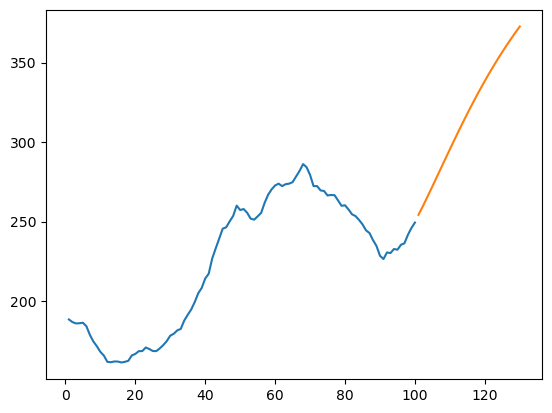

In [66]:
plt.plot(day_new,scaler.inverse_transform(df3[len(df3)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

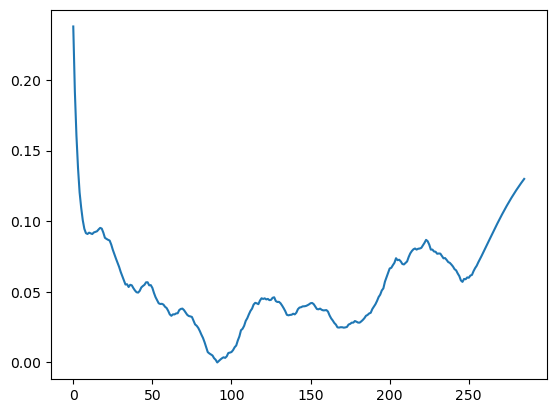

In [67]:
df4=df3.tolist()
df4.extend(lst_output)
plt.plot(df4[1000:])

In [68]:
df4=scaler.inverse_transform(df4).tolist()

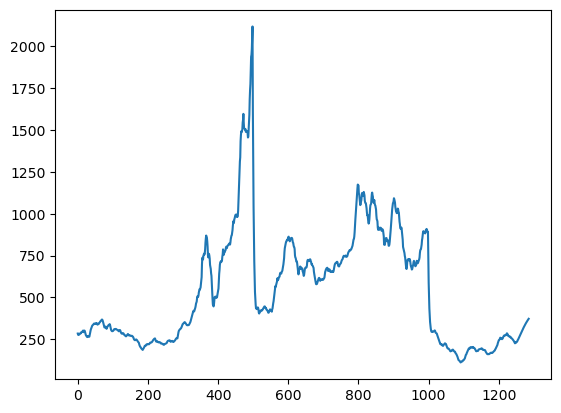

In [69]:
plt.plot(df4)

In [70]:
import pickle
with open('model_pickle_TSLA','wb') as f:
    pickle.dump(model,f)